### housekeeping

In [1]:
import os, sys

In [2]:
cwd = os.getcwd()

In [3]:
base_dir = os.path.abspath(os.path.join(cwd,'..'))  # parent dir

In [4]:
sys.path.append(base_dir)

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import torch

In [8]:
from torch.utils.data import Dataset, DataLoader

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern

### Initialization

In [10]:
dataPoints = 100
samples = 10000
ingrid = False
x_lim =1
np.random.seed(20)
kernel = 'rbf'
ls = 0.1
nu = 2.5

## Gaussian Process

In [11]:
if kernel == 'rbf':
    gp = GaussianProcessRegressor(kernel=RBF(length_scale=ls))
else:
    gp = GaussianProcessRegressor(kernel=Matern(length_scale=ls, nu = nu))

In [12]:
if (ingrid):
    X_ = np.linspace(-x_lim, x_lim, dataPoints)
    y_samples = gp.sample_y(X_[:, np.newaxis], samples)
    eval_points = X_.repeat(samples).reshape(X_.shape[0], samples)
    data = y_samples
else:
    X_ = np.linspace(-x_lim, x_lim, 2*dataPoints)
    X_ = np.random.choice(X_, size=(dataPoints, samples)) # generate random sample
    X_.sort(axis=0)
    y_samples = np.zeros((dataPoints, samples))

    for idx in range(samples):
        x_ = X_[:, idx]
        y_samples[:,idx] = gp.sample_y(x_[:, np.newaxis]).reshape(dataPoints)


In [13]:
idx = 3

In [15]:
X_[:,idx].shape

(100,)

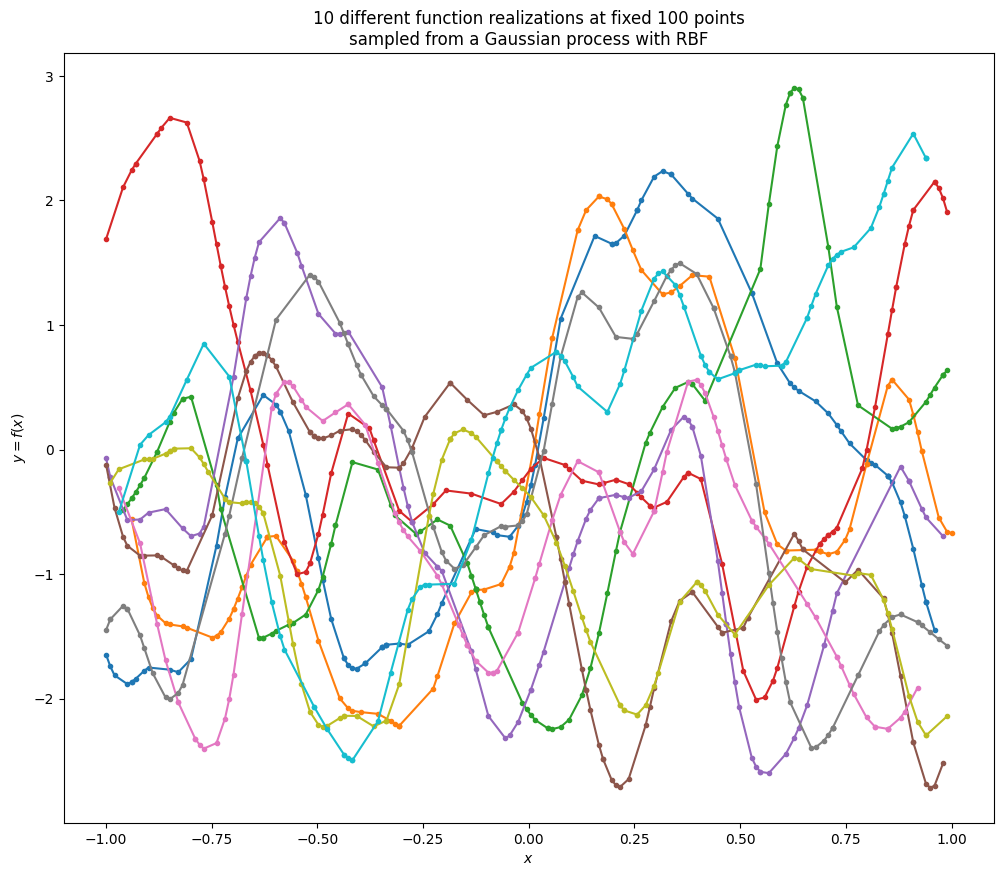

In [23]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for idx in range(10):
    ax.plot(X_[:,idx].reshape(-1,1), y_samples[:,idx].reshape(-1,1), marker='o', markersize=3)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y=f(x)$')
    ax.set_title('10 different function realizations at fixed 100 points\n'
    'sampled from a Gaussian process with RBF')
